In [243]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
data = yf.download(tickers = '^GSPC', start = '2018-01-01',end = '2022-12-9')
data.head(10)


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,2683.729980,2695.889893,2682.360107,2695.810059,2695.810059,3397430000
2018-01-03,2697.850098,2714.370117,2697.770020,2713.060059,2713.060059,3544030000
2018-01-04,2719.310059,2729.290039,2719.070068,2723.989990,2723.989990,3697340000
2018-01-05,2731.330078,2743.449951,2727.919922,2743.149902,2743.149902,3239280000
2018-01-08,2742.669922,2748.510010,2737.600098,2747.709961,2747.709961,3246160000
2018-01-09,2751.149902,2759.139893,2747.860107,2751.290039,2751.290039,3467460000
2018-01-10,2745.550049,2750.800049,2736.060059,2748.229980,2748.229980,3579900000
2018-01-11,2752.969971,2767.560059,2752.780029,2767.560059,2767.560059,3645690000
2018-01-12,2770.179932,2787.850098,2769.639893,2786.239990,2786.239990,3587220000


In [244]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)
data["log(Open)"]=np.log(data["Open"])
#Target variable = log(price(t+1)-log(t))
data["Return_before"]=data["log(Open)"]-data["log(Open)"].shift(+1)
data["Return"]=data["log(Open)"].shift(-1)-data["log(Open)"]
# data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]
data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)
data.head(10)

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,log(Open),Return_before,Return
0,2840.290039,2853.290039,2835.979980,2850.399902,64.711067,2810.775016,2756.057446,2731.602135,7.951661,0.003764,0.005488
1,2855.919922,2863.429932,2855.919922,2858.449951,66.268617,2815.315486,2758.085021,2733.282239,7.957149,0.005488,0.000305
2,2856.790039,2862.439941,2853.090088,2857.699951,65.977928,2819.352102,2760.057594,2734.930156,7.957454,0.000305,0.000140
3,2857.189941,2862.479980,2851.979980,2853.580078,64.317443,2822.611909,2761.909524,2736.501678,7.957594,0.000140,-0.006422
4,2838.899902,2842.199951,2825.810059,2833.280029,56.774115,2823.627920,2763.322801,2737.783510,7.951172,-0.006422,-0.001212
5,2835.459961,2843.399902,2819.879883,2821.929932,53.047096,2823.466207,2764.483338,2738.898032,7.949959,-0.001212,-0.002677
6,2827.879883,2843.110107,2826.580078,2839.959961,57.765925,2825.037041,2765.977925,2740.236601,7.947283,-0.002677,0.000025
7,2827.949951,2827.949951,2802.489990,2818.370117,51.168281,2824.402096,2767.015394,2741.271482,7.947307,0.000025,0.001233
8,2831.439941,2850.489990,2831.439941,2840.689941,56.652174,2825.953319,2768.474296,2742.588283,7.948541,0.001233,0.002427
9,2838.320068,2855.629883,2833.729980,2850.129883,58.751302,2828.255849,2770.091238,2744.012675,7.950968,0.002427,0.005485


In [245]:
#Target column Categories
#y =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
#yi = [data.Open[i]-data.Close[i] for i in range(0, len(data))]
#print(yi)
#print(len(yi))

In [246]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_set_scaled = sc.fit_transform(data)
data_set_scaled.shape[0]

1094

In [247]:
data_set_scaled.shape[0]

1094

In [248]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
print(data_set_scaled.shape[0])
# Indpendent variables
# deleted range(8)
#Columns as an input = list
# 4,5,6,7,
list=[4,5,6,7,9]
for j in range(len(list)):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
            X[j].append(data_set_scaled[i-backcandles:i, list[j]])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

1094
[[[ 8.92739398e-01 -1.10360668e+00 -1.14049787e+00 -1.14785345e+00
    2.95749400e-01]
  [ 1.03087727e+00 -1.09665184e+00 -1.13733915e+00 -1.14519221e+00
    4.43008435e-01]
  [ 1.00509632e+00 -1.09046878e+00 -1.13426611e+00 -1.14258196e+00
    3.06709767e-04]
  ...
  [ 7.99870639e-01 -1.00107274e+00 -1.06446389e+00 -1.08059565e+00
    2.27046979e-01]
  [ 8.18682351e-01 -9.97095217e-01 -1.06137538e+00 -1.07784906e+00
    2.54803630e-01]
  [ 1.82581369e-01 -9.95856843e-01 -1.05884716e+00 -1.07547830e+00
   -1.00676414e-01]]

 [[ 1.03087727e+00 -1.09665184e+00 -1.13733915e+00 -1.14519221e+00
    4.43008435e-01]
  [ 1.00509632e+00 -1.09046878e+00 -1.13426611e+00 -1.14258196e+00
    3.06709767e-04]
  [ 8.57829290e-01 -1.08547559e+00 -1.13138103e+00 -1.14009272e+00
   -1.37563201e-02]
  ...
  [ 8.18682351e-01 -9.97095217e-01 -1.06137538e+00 -1.07784906e+00
    2.54803630e-01]
  [ 1.82581369e-01 -9.95856843e-01 -1.05884716e+00 -1.07547830e+00
   -1.00676414e-01]
  [ 5.79622739e-01 -9.92

In [249]:
#also comprehensions for X
#X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
#print(X)
#print(X.shape)

In [250]:
# split data into train test sets
splitlimit = int(len(X)*0.9)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

957
(957, 30, 5)
(107, 30, 5)
(957, 1)
(107, 1)
[[ 4.41622851e-01]
 [ 3.59249754e-01]
 [ 4.71027368e-01]
 [-4.61025718e-01]
 [-2.80461126e-02]
 [-1.65260210e-01]
 [-1.81915898e-01]
 [-7.32361458e-02]
 [ 4.50206350e-01]
 [-9.84126294e-02]
 [ 2.04466272e-01]
 [-3.85969089e-01]
 [-5.18935689e-01]
 [-7.64845606e-01]
 [ 1.21982930e-01]
 [-2.81210962e-01]
 [-2.95918827e+00]
 [-2.20627944e-01]
 [-2.32812562e-01]
 [ 7.37439365e-02]
 [ 1.34059607e+00]
 [-3.19957611e-01]
 [-8.32404893e-01]
 [-7.86475421e-02]
 [-1.67056392e+00]
 [ 5.01262510e-01]
 [-2.01371410e+00]
 [-2.50146591e-01]
 [ 4.46479051e-01]
 [-1.37251961e+00]
 [ 2.04869580e+00]
 [ 3.51646399e-01]
 [ 8.45757104e-01]
 [-6.21350919e-01]
 [ 3.50331380e-01]
 [ 1.08150825e+00]
 [ 9.61492464e-01]
 [-4.00255123e-01]
 [-6.44509444e-01]
 [-1.38759285e+00]
 [ 2.19528815e-01]
 [-1.42151390e+00]
 [ 7.64011941e-01]
 [ 3.56734619e-01]
 [-2.44100767e+00]
 [ 7.52601293e-02]
 [-8.12809317e-01]
 [ 5.11330514e-01]
 [ 4.17286785e-01]
 [ 8.57884453e-01]
 [

In [251]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

#Change nr of inputs
lstm_input = Input(shape=(backcandles, len(list)), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=40, shuffle=True, validation_split = 0.1)

Epoch 1/40
58/58 [==============================] - 2s 17ms/step - loss: 0.9275 - val_loss: 1.7057
Epoch 2/40
58/58 [==============================] - 1s 11ms/step - loss: 0.9145 - val_loss: 1.7445
Epoch 3/40
58/58 [==============================] - 1s 12ms/step - loss: 0.8989 - val_loss: 1.6964
Epoch 4/40
58/58 [==============================] - 1s 11ms/step - loss: 0.8989 - val_loss: 1.7652
Epoch 5/40
58/58 [==============================] - 1s 11ms/step - loss: 0.9002 - val_loss: 1.7167
Epoch 6/40
58/58 [==============================] - 1s 11ms/step - loss: 0.8953 - val_loss: 1.7573
Epoch 7/40
58/58 [==============================] - 1s 11ms/step - loss: 0.8992 - val_loss: 1.7689
Epoch 8/40
58/58 [==============================] - 1s 11ms/step - loss: 0.8899 - val_loss: 1.7795
Epoch 9/40
58/58 [==============================] - 1s 11ms/step - loss: 0.8854 - val_loss: 1.7746
Epoch 10/40
58/58 [==============================] - 1s 11ms/step - loss: 0.8857 - val_loss: 1.7266
Epoch 11/

In [252]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

4/4 [==============================] - 0s 5ms/step
[-0.6676156] [-0.18665206]
[-0.6045355] [-0.66610584]
[-0.30563492] [-1.64362891]
[0.36563885] [-0.38076883]
[1.3526677] [1.19115822]
[1.2298709] [1.43352052]
[0.37120828] [-0.53434539]
[0.28522226] [1.60871303]
[-0.09202482] [0.41050601]
[0.54589194] [0.89693297]


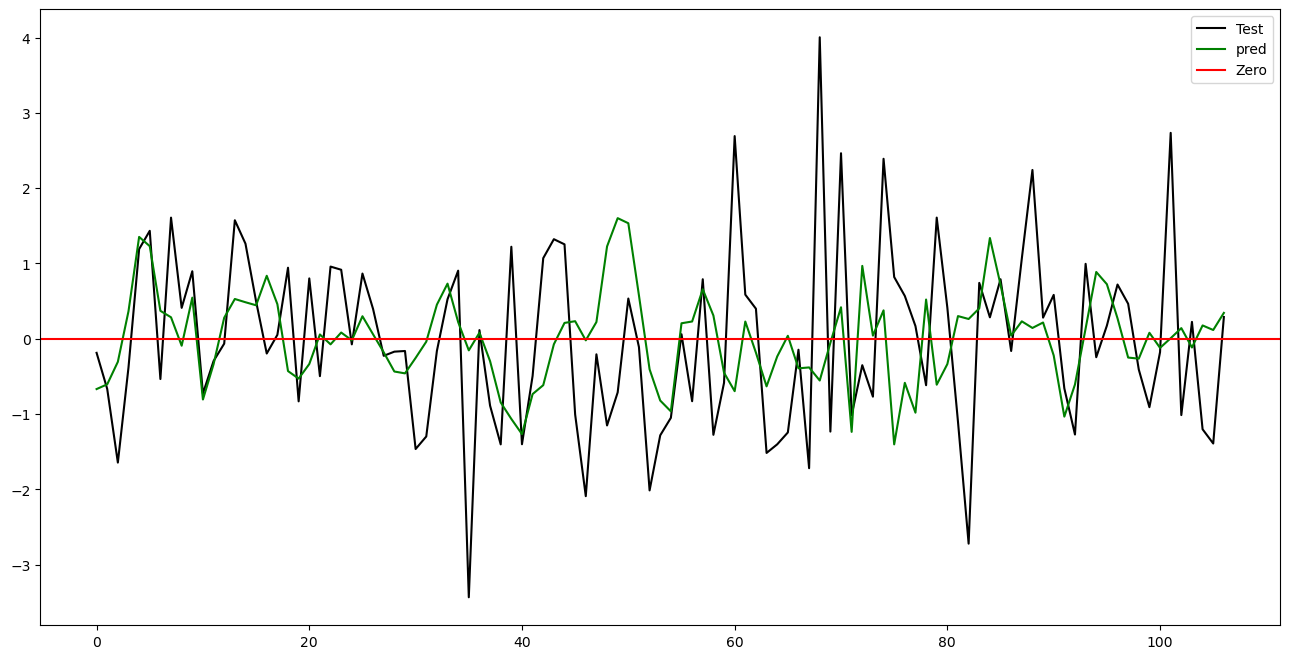

In [253]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.axhline(y = 0, color = 'r', linestyle = '-', label="Zero")
plt.legend()
plt.show()

In [254]:
# Evaluate results
sum((y_test>0)==(y_pred>0))/(len(y_test))

array([0.59813084])